In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
length_data = pd.read_csv("Data/rt.movie_info.tsv", sep='\t')
ratings_data = pd.read_csv("Data/tmdb.movies.csv")


In [4]:
length_data.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [5]:
ratings_data.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [6]:
length_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [7]:
ratings_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [9]:
length_rating_df = pd.merge(
    length_data[["id", "runtime"]],
    ratings_data[["id", "vote_average", "vote_count"]],
    on="id",
    how="inner"
)
length_rating_df.head()

,id,runtime,vote_average,vote_count
0,27,NaN,4.9,170
1,90,96 minutes,7.1,1827
2,93,110 minutes,7.9,359
3,95,116 minutes,6.7,4267
4,189,94 minutes,6.3,2210


In [11]:
length_rating_df["runtime"] = length_rating_df["runtime"].astype(str).str.replace(" minutes", '', regex=False).str.strip()
length_rating_df["runtime"] = pd.to_numeric(length_rating_df["runtime"], errors="coerce")

length_rating_df.head()

,id,runtime,vote_average,vote_count
0,27,NaN,4.9,170
1,90,96.0,7.1,1827
2,93,110.0,7.9,359
3,95,116.0,6.7,4267
4,189,94.0,6.3,2210


In [12]:
print(length_rating_df.duplicated().value_counts())

False    27
True      5
Name: count, dtype: int64


In [14]:
length_rating_df = length_rating_df.drop_duplicates()
length_rating_df.head()

,id,runtime,vote_average,vote_count
0,27,NaN,4.9,170
1,90,96.0,7.1,1827
2,93,110.0,7.9,359
3,95,116.0,6.7,4267
4,189,94.0,6.3,2210


In [13]:
print(length_rating_df.isnull().sum())

id              0
runtime         1
vote_average    0
vote_count      0
dtype: int64


In [17]:
length_rating_df.dropna(subset=["runtime"], inplace=True)
print(length_rating_df["runtime"].isnull().sum())

0


In [52]:
vote_limit = 3
filtered_movies_df = length_rating_df[length_rating_df['vote_count'] >=vote_limit].copy()


In [58]:
movie_length_limits = [0,90,110,140,500]
category_names = ["< 90 min (Short)", "90-110 min (Average)", "110-130 min (Long)", "> 130 min (Epic)"]
filtered_movies_df["runtime_category"] = pd.cut(
    filtered_movies_df["runtime"],
    bins=movie_length_limits,
    labels=category_names,
    right=False
)


In [59]:
ratings_by_length = filtered_movies_df.groupby("runtime_category", observed=True)["vote_average"].mean().sort_values(ascending=False).reset_index()
ratings_by_length.head()

,runtime_category,vote_average
0,> 130 min (Epic),7.766667
1,< 90 min (Short),7.625000
2,90-110 min (Average),7.466667
3,110-130 min (Long),7.400000


C:\Users\Vicky\AppData\Local\Temp\ipykernel_18168\3979198519.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


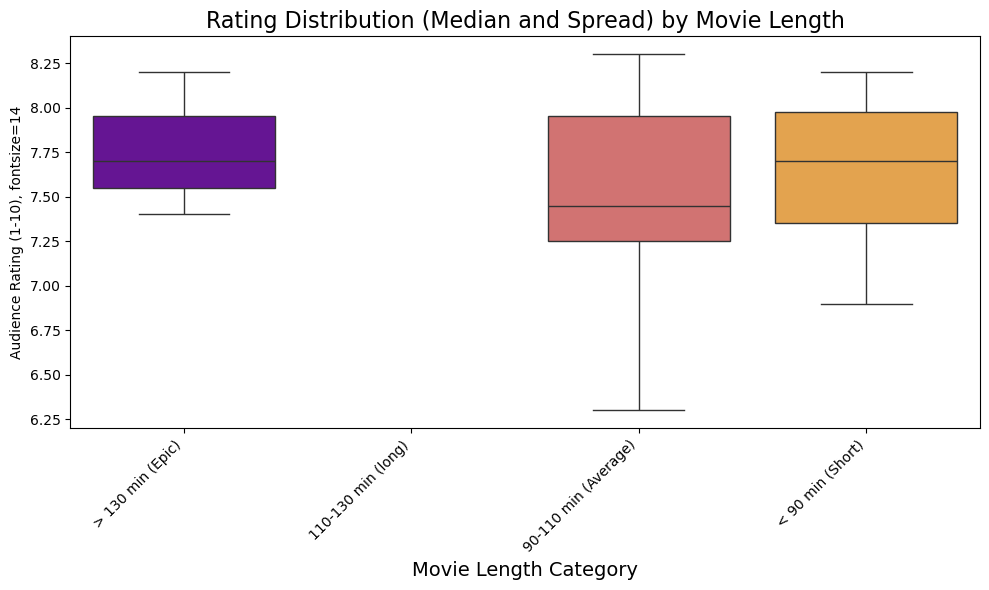

In [60]:
plt.figure(figsize=(10, 6))

sns.boxplot(
    x="runtime_category",
    y="vote_average",
    data=length_rating_df,
    palette="plasma",
    order=['> 130 min (Epic)', '110-130 min (long)', '90-110 min (Average)', '< 90 min (Short)']
)

plt.title("Rating Distribution (Median and Spread) by Movie Length", fontsize=16)
plt.xlabel("Movie Length Category", fontsize=14)
plt.ylabel("Audience Rating (1-10), fontsize=14")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()